In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

In [3]:
df = pd.read_excel('D:/sem4/applied biostatics/project/B21022.xlsx','Task 3')

print(df.head()) # Displaying the first few rows of the DataFrame
print(df.info()) # Getting information about the DataFrame, including data types

   Unnamed: 0  C_level  T_cell
0           1   1983.8   518.0
1           2   1744.2   544.0
2           3   1209.2   938.0
3           4   1449.5   762.0
4           5   1597.8   689.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   C_level     100 non-null    float64
 2   T_cell      100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


C:\Users\Acer\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
correlation = df['C_level'].corr(df['T_cell'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.9151056797968393


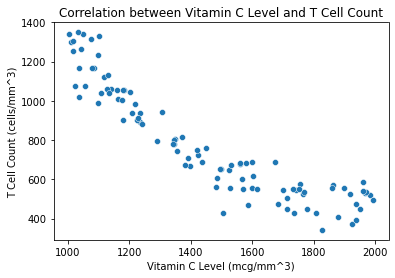

In [5]:
sns.scatterplot(data=df, x='C_level', y='T_cell')
plt.xlabel('Vitamin C Level (mcg/mm^3)')
plt.ylabel('T Cell Count (cells/mm^3)')
plt.title('Correlation between Vitamin C Level and T Cell Count')
plt.show()

In [6]:
print("Descriptive Statistics for Vitamin C Level:")
print(df['C_level'].describe())
print("Descriptive Statistics for T Cell Count:")
print(df['T_cell'].describe())

Descriptive Statistics for Vitamin C Level:
count     100.000000
mean     1451.143000
std       308.486667
min      1003.100000
25%      1173.400000
50%      1429.300000
75%      1717.500000
max      1994.400000
Name: C_level, dtype: float64
Descriptive Statistics for T Cell Count:
count     100.00000
mean      781.25000
std       280.10984
min       342.00000
25%       549.75000
50%       689.50000
75%      1025.25000
max      1350.00000
Name: T_cell, dtype: float64


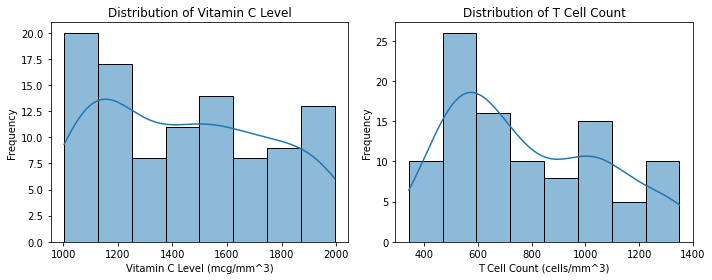

In [7]:
# Distribution Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['C_level'], kde=True)
plt.xlabel('Vitamin C Level (mcg/mm^3)')
plt.ylabel('Frequency')
plt.title('Distribution of Vitamin C Level')
plt.subplot(1, 2, 2)
sns.histplot(df['T_cell'], kde=True)
plt.xlabel('T Cell Count (cells/mm^3)')
plt.ylabel('Frequency')
plt.title('Distribution of T Cell Count')
plt.tight_layout()
plt.show()

In [8]:
corr_matrix = np.corrcoef(df['C_level'], df['T_cell'])
corr = corr_matrix[0, 1]
n = len(df)
conf_interval = 1.96 * np.sqrt((1 - corr ** 2) / (n - 2))
lower_bound = corr - conf_interval
upper_bound = corr + conf_interval
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

95% Confidence Interval: (-0.9949379947845668, -0.8352733648091119)


In [9]:
slope, intercept, r_value, p_value, std_err = linregress(df['C_level'], df['T_cell'])
print("Regression Coefficients:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value ** 2)
print("P-value:", p_value)
print("Standard Error:", std_err)

Regression Coefficients:
Slope: -0.8309276662860462
Intercept: 1987.044866437332
R-squared: 0.8374184051964356
P-value: 1.9293289425637757e-40
Standard Error: 0.03698406300276937


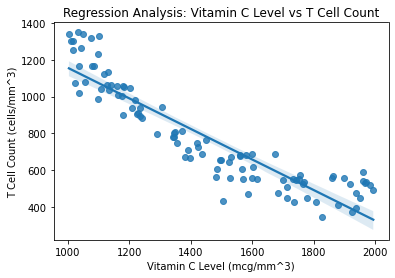

In [11]:
sns.regplot(data=df, x='C_level', y='T_cell')
plt.xlabel('Vitamin C Level (mcg/mm^3)')
plt.ylabel('T Cell Count (cells/mm^3)')
plt.title('Regression Analysis: Vitamin C Level vs T Cell Count')
plt.show()

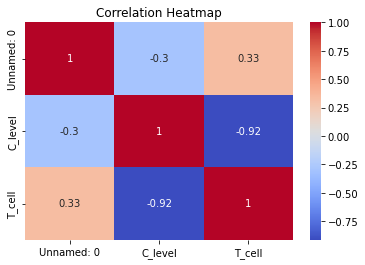

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()